![header](../figures/logos_partenaires._cmems_se.jpg)

# Evaluate CalCNN method on SWOT tracks

<div style="text-align: right"><i> 2023-01-19 evaluation_onnadirs_CalCNNmethod </i></div>

***
**Authors:**  Datlas, IGE, IMT-Atlantique & CLS <br>
**Copyright:** 2022 Datlas, IGE, IMT-Atlantique & CLS <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h1><center>Evaluate CalCNN method calibration on SWOT tracks </center></h1></div>

In [2]:
import os
import glob
import sys
sys.path.append('..')
from src.benchmark import *
from src.plot import *
from src.swot import *

<div class="alert alert-info" role="alert">

<h2>1. Input files to analyse</h2>

</div>

## Data challenge inputs

In [3]:
# Check if inputs have already been downloaded otherwise do
from pathlib import Path
Path('../inputs').mkdir(exist_ok=True)
if len(os.listdir('../inputs'))<2:
    # Get pseuso-observation
    print('Downloading and unzipping inputs')
    !wget https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/fileServer/meomopendap/extract/ocean-data-challenges/2022c_SWOT_error_calibration_GS/dc_SWOTcalibGS_inputs.tar.gz
    !tar -xvf dc_SWOTcalibGS_inputs.tar.gz dc_SWOTcalibGS_inputs    
    !mv dc_SWOTcalibGS_inputs  ../inputs/    
    !rm dc_SWOTcalibGS_inputs.tar.gz
     

--2023-01-17 12:02:06--  https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/fileServer/meomopendap/extract/ocean-data-challenges/2022c_SWOT_error_calibration_GS/dc_SWOTcalibGS_inputs.tar.gz
Resolving ige-meom-opendap.univ-grenoble-alpes.fr (ige-meom-opendap.univ-grenoble-alpes.fr)... 129.88.191.39
Connecting to ige-meom-opendap.univ-grenoble-alpes.fr (ige-meom-opendap.univ-grenoble-alpes.fr)|129.88.191.39|:443... connected.
HTTP request sent, awaiting response... 200 200
Length: 32539136 (31M) [application/octet-stream]
Saving to: ‘dc_SWOTcalibGS_inputs.tar.gz’

dc_SWOTcalibGS_inpu 100%[===================>]  31,03M  7,38MB/s    in 4,2s    

2023-01-17 12:02:10 (7,32 MB/s) - ‘dc_SWOTcalibGS_inputs.tar.gz’ saved [32539136/32539136]

dc_SWOTcalibGS_inputs/
dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass14.nc
dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass04.nc
dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass24.nc
dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass34.nc
dc_SWOTcalibGS_inp

In [6]:
 list_of_file_inputs = sorted(glob.glob('../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass*.nc')) 

## Filtered outputs to evaluate

In [7]:
xr.open_dataset(list_of_file_inputs[0])

<xarray.Dataset>
Dimensions:    (time: 553, nC: 61)
Coordinates:
  * time       (time) datetime64[ns] 2012-10-25T18:05:19.207492 ... 2012-10-2...
  * nC         (nC) int64 0 1 2 3 4 5 6 7 8 9 ... 51 52 53 54 55 56 57 58 59 60
Data variables:
    lat        (time, nC) float64 ...
    lon        (time, nC) float64 ...
    lat_nadir  (time) float32 ...
    lon_nadir  (time) float32 ...
    x_ac       (time, nC) float64 ...
    x_al       (time) float32 ...
    ssh_true   (time, nC) float64 ...
    ssh_err    (time, nC) float64 ...
Attributes: (12/26)
    Conventions:               CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    corresponding_grid:        /data/MSA_ETU/mballarotta/ETUDE_BOOST-SWOT/out...
    creator_email:             lucile.gaultier@gmail.com
    creator_name:              Lucile Gaultier and Clement Ubelmann
    date_created:              2018-11-27T12:56:51Z
    ...                        ...
    references:                Gaultier, L., C. Ubelmann, and L.-L. Fu, 2016:...
    standard_name_vocabulary:  CF-1.6
    summary:                   SWOT grid data produced
    time_coverage_end:         0.03536939882970834
    time_coverage_start:       0.00035300925925696447
    title:                     SWOT-like data simulated by SWOT simulator

In [8]:
add_inter_sw = lambda ds:(
            ds
        .assign_coords(x_ac=lambda ds: ('nC', ds.x_ac.isel(time=0).data))
        .swap_dims(nC='x_ac')
        .reindex(x_ac=np.arange(-60, 62, 2), fill_value=np.nan)
)

ds = xr.open_dataset('../../../latex/CalibrationTGRS2022_Febvre/calib_results.nc', engine='netcdf4')
!rm -rf ../results
Path('../results/calib_CalCNNmethod').mkdir(exist_ok=True, parents=True)
for p in np.unique(ds.contiguous_chunk):
    pass_ds = ds.isel(time=ds.contiguous_chunk==p)
    (
        pass_ds
        .pipe(add_inter_sw)
        .rename(
            {
                'cal': 'ssh_err_calib',
                'ssh_model': 'ssh_true'
            })
        .to_netcdf(f'../results/calib_CalCNNmethod/pass_{int(p):02}.nc')
    )

In [9]:
list_of_file = sorted(glob.glob('../results/calib_CalCNNmethod/pass*.nc'))

<div class="alert alert-info" role="alert">

<h2>2. Illustration on one pass (same as quickstart example)</h2>

</div>

../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass02.nc ../results/calib_CalCNNmethod/pass_02.nc


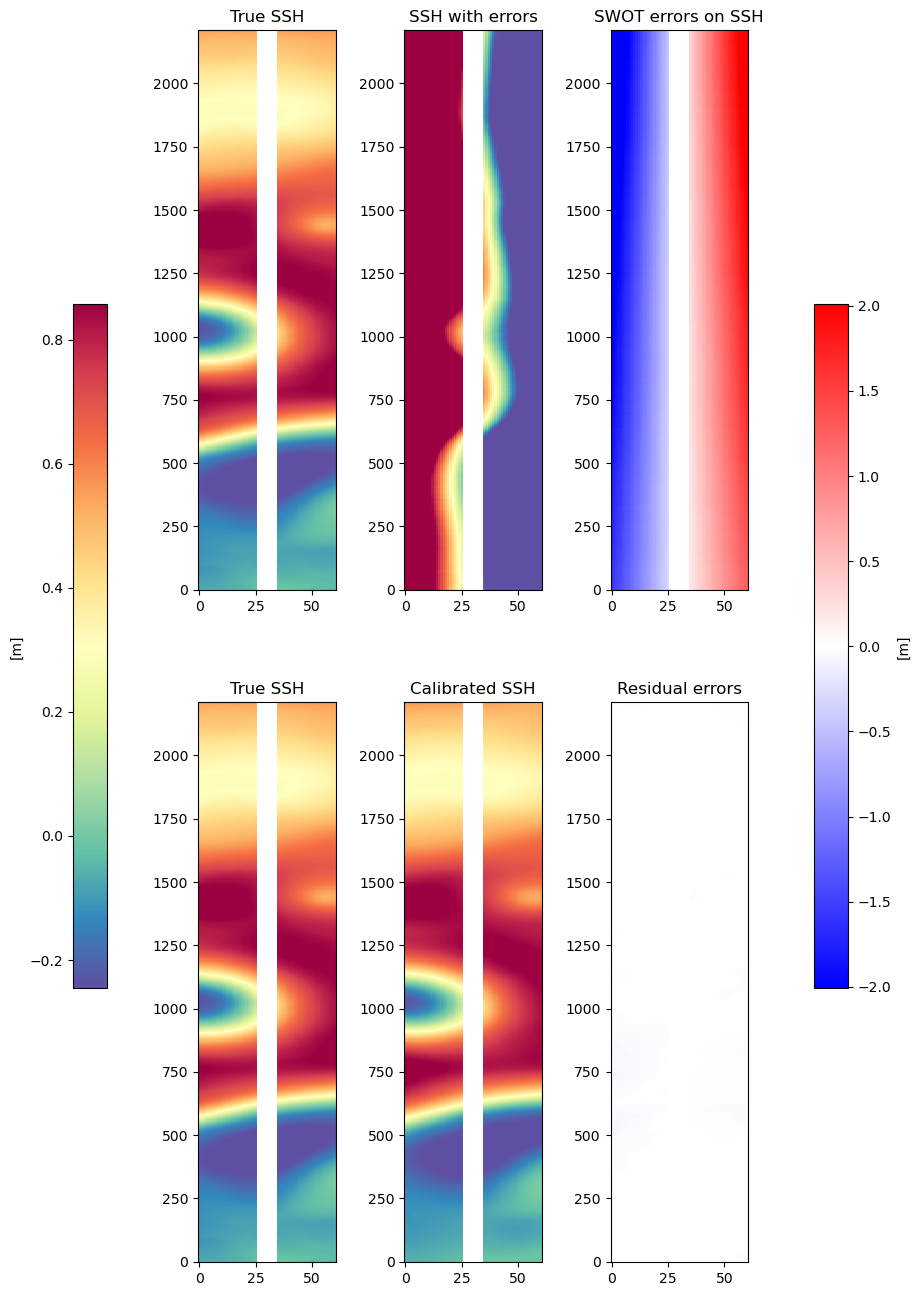

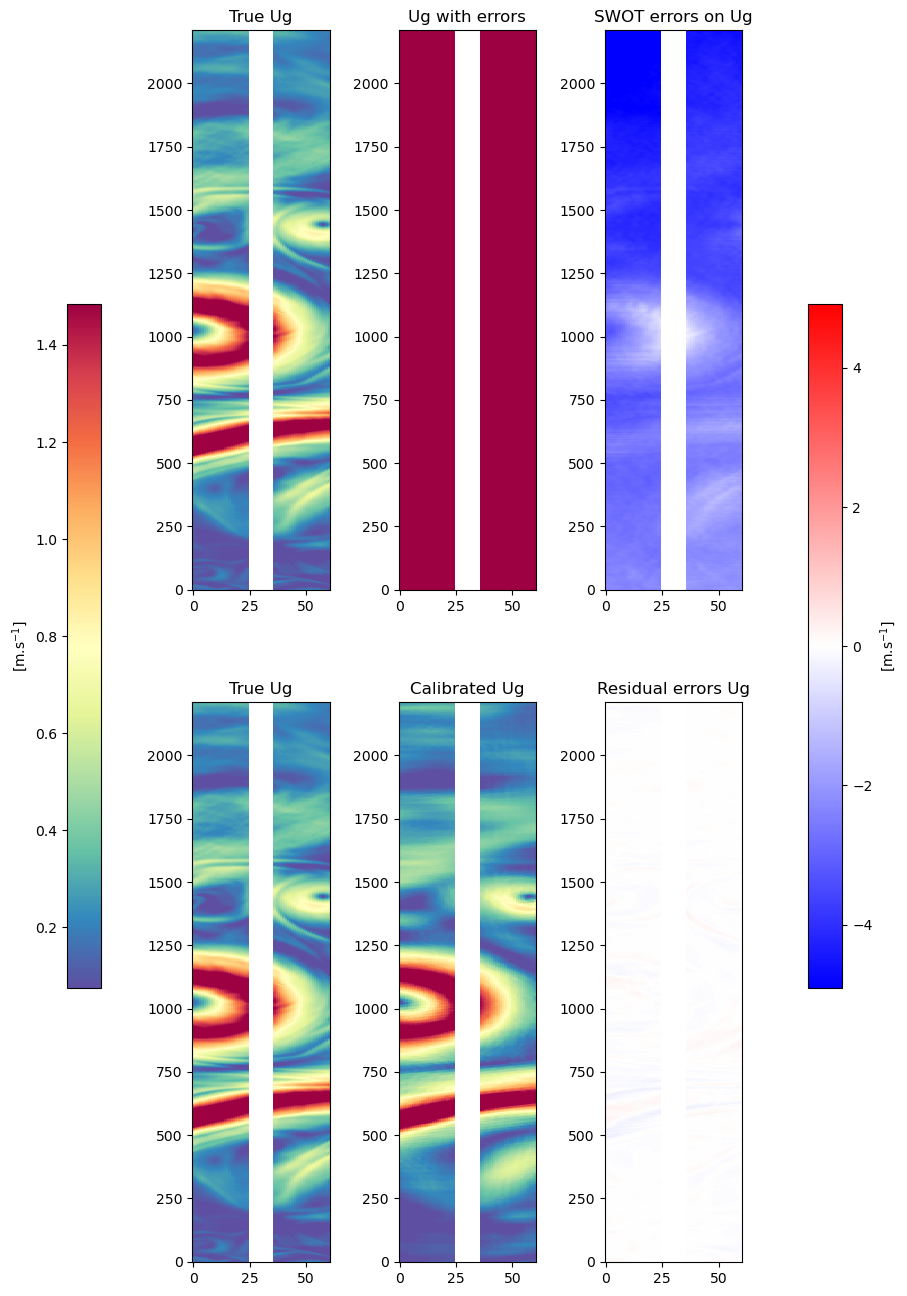

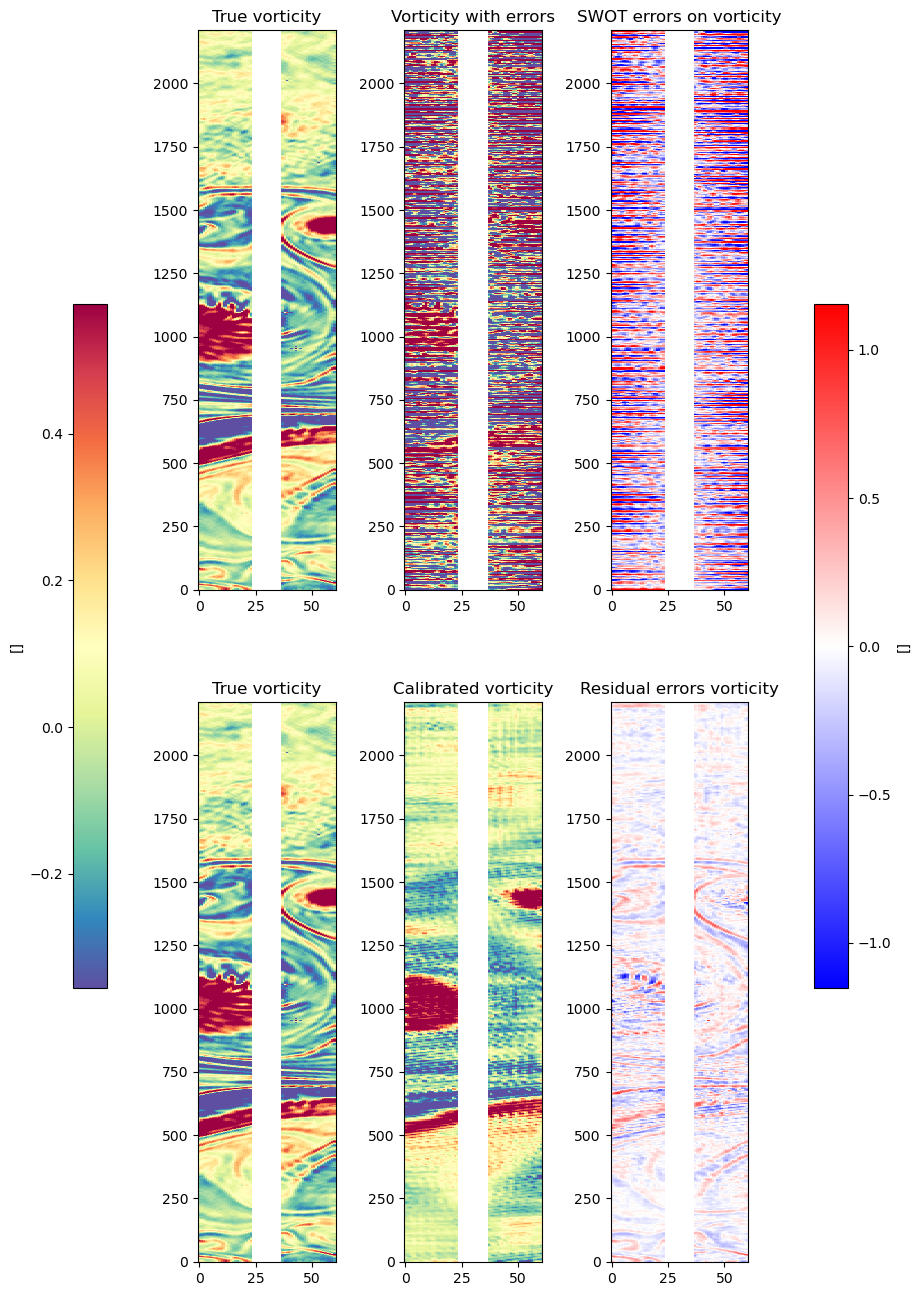

In [10]:
print(sorted(list_of_file_inputs)[0], sorted(list_of_file)[0])
plot_demo_pass(sorted(list_of_file_inputs)[0], sorted(list_of_file)[0])

In [11]:
swt_input = SwotTrack(list_of_file[0])
np.sqrt(np.mean((swt_input._dset.ssh_true-swt_input._dset.ssh_err_calib)**2))

<xarray.DataArray ()>
array(0.01444136)

<div class="alert alert-info" role="alert">

<h2>3. Statistical & Spectral Analysis </h2>

</div>

## 3.1 Parameters

In [12]:
etuvar = 'ssh_err_calib'
calib_name = 'CalCNN'
output_dir = '../results/calib_CalCNNmethod/'
stat_output_filename = f'{output_dir}/stat_CalCNNmethod.nc'
stat_by_regime_output_filename = f'{output_dir}/stat_by_regime_CalCNNmethod.nc'
psd_output_filename = f'{output_dir}/psd_CalCNNmethod.nc'
ldb_output_filename = f'{output_dir}/ldb_CalCNNmethod.nc'
baseline_bench = Benchmark()

## 3.2 Compute grid boxes statistics

SSH: <xarray.DataArray 'ssh_rmse' ()>
array(0.01368203)
Ug: <xarray.DataArray 'ug_rmse' ()>
array(0.07285983)
Ksi: <xarray.DataArray 'ksi_rmse' ()>
array(0.20123551)


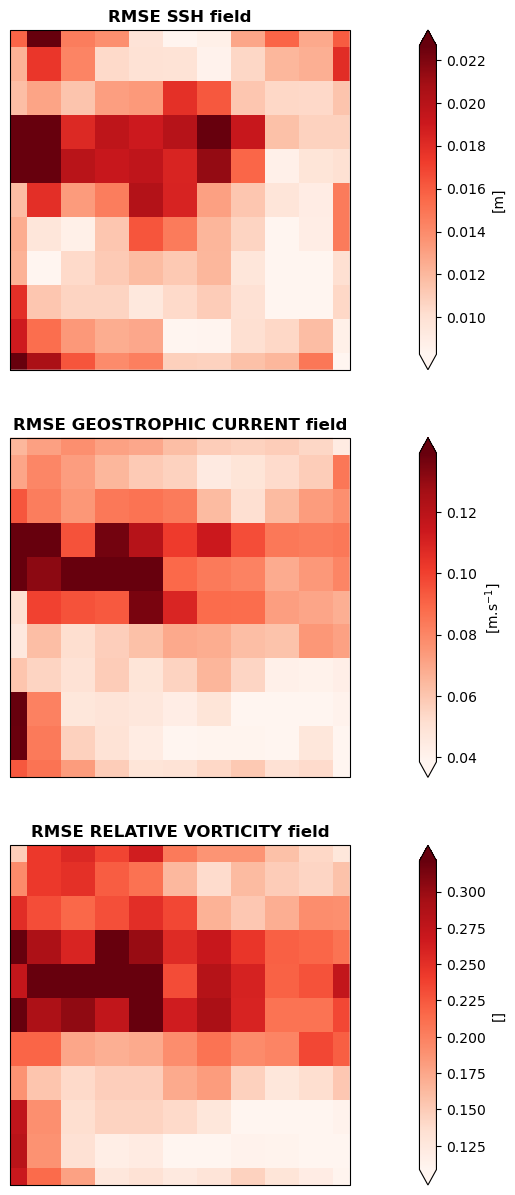

CPU times: user 5.33 s, sys: 760 ms, total: 6.09 s
Wall time: 5.14 s


In [13]:
%%time
# Compute gridded stats
baseline_bench.compute_stats(list_of_file, etuvar, list_of_file_inputs)

# Write gridded stats 
baseline_bench.write_stats(stat_output_filename, calib=calib_name)

# Plot gridded stats
baseline_bench.display_stats(stat_output_filename, xlim=(-65, -55), ylim=(33, 43))

## 3.4 Compute Spectral scores

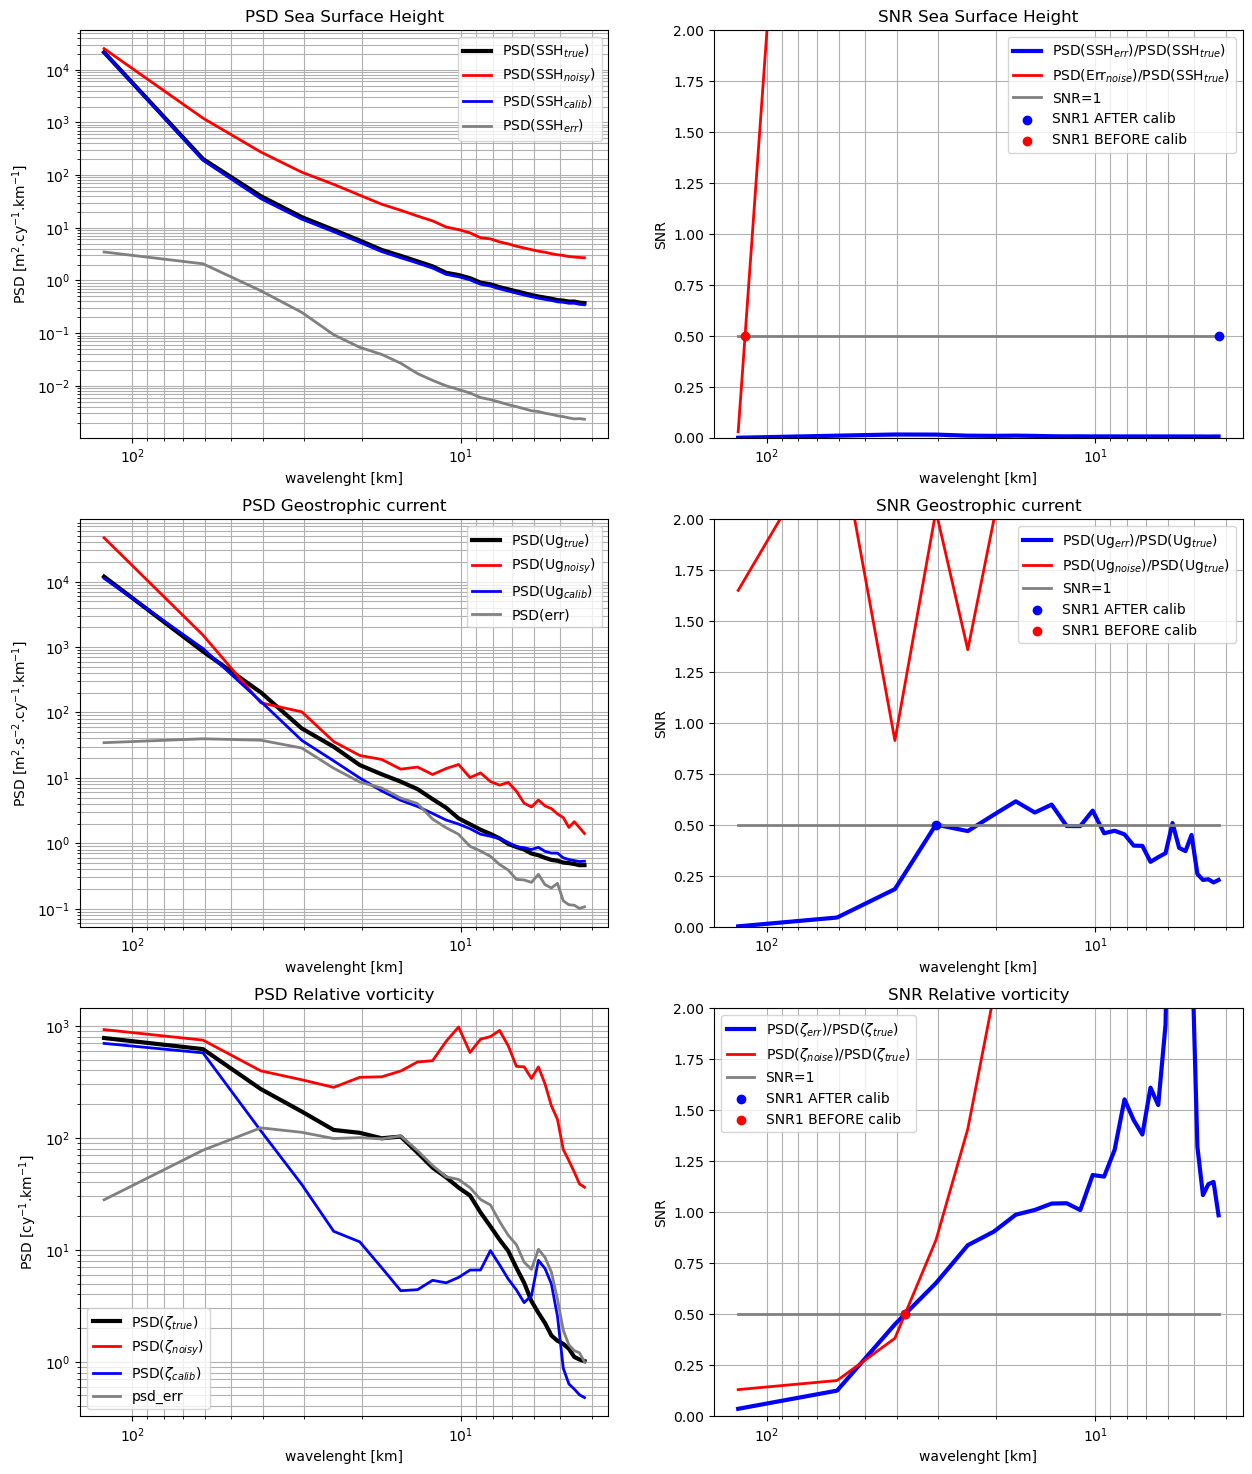

CPU times: user 3.59 s, sys: 780 ms, total: 4.37 s
Wall time: 3.6 s


In [14]:
%%time
# Compute PSD scores
baseline_bench.compute_along_track_psd(list_of_file, etuvar,list_of_file_inputs, lengh_scale=400,overlay=0,psd_type='powerspec')

# Write PSD scores
baseline_bench.write_along_track_psd(psd_output_filename, calib=calib_name,psd_type='powerspec')

# Plot PSD scores
baseline_bench.display_psd(psd_output_filename)

<div class="alert alert-info" role="alert">

<h2>4. Leaderboard </h2>

</div>

In [16]:
!mkdir -p ../results/no_calib
baseline_bench.summary('evaluate_CalCNNmethod_calibration.ipynb', fname=ldb_output_filename)

Summary of the leaderboard metrics:
|    | Method   | Field                          |   µ(RMSE) |   λ(SNR1) [km] | Reference   |
|---:|:---------|:-------------------------------|----------:|---------------:|:------------|
|  0 | no calib | SSH [m]                        |  3.3952   |          116.3 |             |
|  1 | no calib | Geostrophic current [m.s$^-1$] |  9.43752  |          nan   |             |
|  2 | no calib | Relative vorticity []          |  0.759946 |           37.9 |             |
|    | Method   | Field                          |   µ(RMSE) |   λ(SNR1) [km] | Reference                               |
|---:|:---------|:-------------------------------|----------:|---------------:|:----------------------------------------|
|  0 | CalCNN   | SSH [m]                        | 0.0135438 |            4.2 | evaluate_CalCNNmethod_calibration.ipynb |
|  1 | CalCNN   | Geostrophic current [m.s$^-1$] | 0.0757345 |           30.6 | evaluate_CalCNNmethod_calibration.ipynb |
|  2 |